In [6]:
# Ejercicio 2
# leemos los datos

datos = read.csv("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/03_efectos_aleatorios_y_mixtos/datos/battery_data.txt", sep="\t")
head(datos)
attach(datos)

trt,lifetime
BrandA,110
BrandA,113
BrandA,108
BrandA,115
BrandB,118
BrandB,116


**a)** Escriba el modelo estadı́stico sobre el que basará su estudio y explique sus componentes.

$$y_{ij} = \mu + A_i + \epsilon_{ij}$$

Donde $A_i$ es el efecto aleatorio y $e_i$ el error o los residuos.

**b)** Establezca las suposiciones necesarias para un análisis de varianza de los datos.

- $A_i$ es una variable aletoria
- Independiente
- $\epsilon_i = N(0, \sigma_\epsilon^2)$
- $A_i = N(0, \sigma_A^2)$
- Y $var(y_i) = \sigma^2_A + \sigma^2_{\epsilon}$

In [7]:
# Ajustamos un modelo de únicamente efectos aleatorios
library(lme4)
# la marca de baterias es un efecto aleatorio
m = lmer(lifetime ~ 1 + (1|trt), REML=TRUE)
confint(m)

# nos damos cuenta que es significativa la interaccion porque  
# .sig01 es el del factor aleatorio, si el limite inferior es 0 entonces NO ES SIGNIFICATIVO, pero vemos que es muy importante
# .sigma es siempre un estimador del error estandar

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.6530752,7.166913
.sigma,1.9371621,4.374014
(Intercept),109.1585596,116.716437


Vemos que es significativa el aporte del efecto aleatorio ya que el límite inferior del Intervalo de confianza ``.sig01`` NO es cero.

**c)** ¿Cambiarı́a el modelo si el objetivo de los investigadores fuera comparar la vida útil de las baterı́as
producidas por esas marcas en particular?. En caso de respuesta afirmativa, escriba el modelo apropiado y realice la prueba ANOVA correspondiente.

Si me interesa conocer la marca que dura más entonces debería estudiarlo como efecto fijo, por lo que el modelo queda de la siguiente manera:

$$y_{ij} = \mu + \tau_i + \epsilon_{ij}$$

Hacemos luego el análisis ANOVA:

In [9]:
m0 = aov(lifetime~trt)
summary(m0)

            Df Sum Sq Mean Sq F value  Pr(>F)   
trt          3 141.69   47.23   6.211 0.00863 **
Residuals   12  91.25    7.60                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

En este caso, vemos que nos da significativo la marca de batería en el análisis ya que el pvalor=0.00863, entonces, ahora sí hacemos comparaciones multuples usando ``tukey``:

In [10]:
# si tenemos efecto fijo y un solo factor podemos hacer tukey asi
TukeyHSD(m0)

# el grafico exploratorio boxplot nos dice una cosa que luego vemos que no es tan asi, eso lo vemos con los IC
# para aquellos que no se incluyen el 0 
# - D con C
# - C con B

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lifetime ~ trt)

$trt
               diff       lwr      upr     p adj
BrandB-BrandA  4.25  -1.53904 10.03904 0.1841092
BrandC-BrandA -2.75  -8.53904  3.03904 0.5167931
BrandD-BrandA  4.25  -1.53904 10.03904 0.1841092
BrandC-BrandB -7.00 -12.78904 -1.21096 0.0169072
BrandD-BrandB  0.00  -5.78904  5.78904 1.0000000
BrandD-BrandC  7.00   1.21096 12.78904 0.0169072


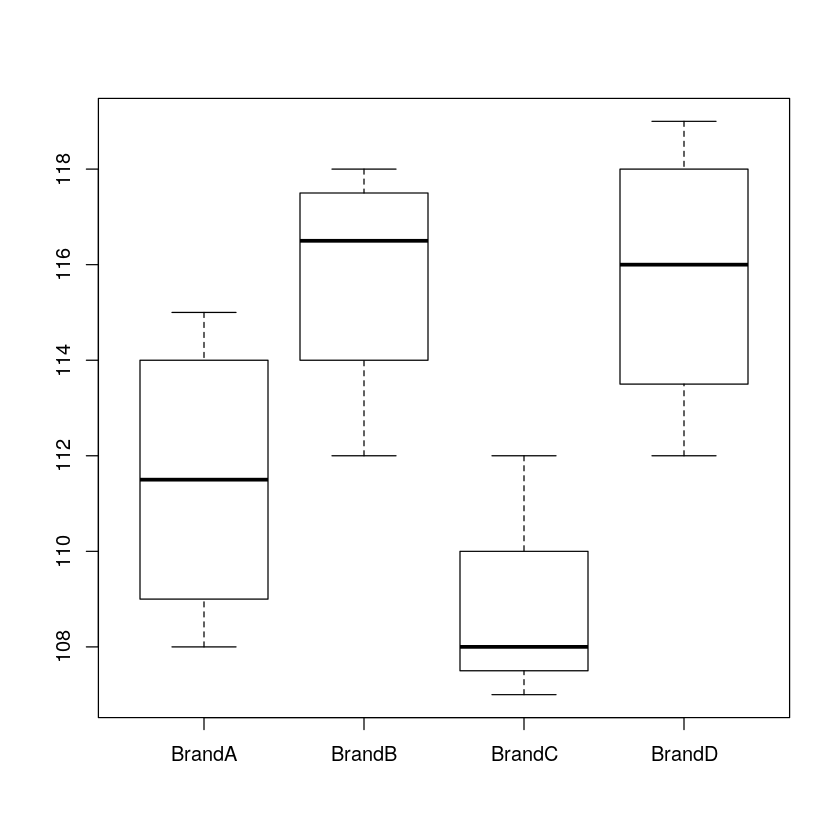

In [11]:
boxplot(lifetime~trt)

In [12]:
# esto 
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R")
maxHSU(lifetime, trt, alpha=0.05, 7.60, 12) 

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "BrandA"
[1] "BrandB"
[1] "BrandD"


[1] NA       "BrandA" "BrandB" "BrandD"